## ADM1F: Execution time 

Here we calculate the execution time for a sample of size 100. We perturb a certain number of elements in one of the inputs files (e.g. influent.dat, ic.dat, params.dat) by some 'percent' value. We sample perturbed elements 100 times in a non-repeatable fashion using latin hypercube 'lhs' or 'uniform' sampling methods. Then we calculate the execution time 100 times. Note, if you do not have any of the packages used in this script, use `pip install package_name`.

Authors: Wenjuan Zhang and Elchin Jafarov

In [1]:
import adm1f_utils as adm1fu
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# navigate to simulations folder
os.chdir('../simulations')

**1.** Let's vary elements of the influent.dat

In [3]:
#Set the path to the ADM1F executable
ADM1F_EXE = 'path-to-your-ADM1F-folder/build/adm1f'

# Set the value of percentage and sample size for lhs
percent = 0.1 # NOTE: for params percent should be <= 0.05 
sample_size = 100
variable = 'influent'    # influent/params/ic
method = 'lhs'    #'uniform' or 'lhs'

In [4]:
#use help command to learn more about create_a_sample_matrix function
#help(adm1fu.create_a_sample_matrix)

In [5]:
index=adm1fu.create_a_sample_matrix(variable,method,percent,sample_size)
print ()
print ('Number of elements participated in the sampling:',len(index))

Saves a sampling matrix [sample_size,array_size] into var_influent.csv
sample_size,array_size:  (100, 11)
Each column of the matrix corresponds to a variable perturbed 100 times around its original value 
var_influent.csv SAVED!

Number of elements participated in the sampling: 11


In [6]:
exe_time=adm1fu.adm1f_output_sampling(ADM1F_EXE,variable,index)

All 100 runs were successfully computed
outputs_influent.csv SAVED!


**Note:** Depending on the computer system configuration, the computational time might vary. 

cumulative time: 23.97 seconds
mean time: 0.24 seconds
min time: 0.16 seconds
max time: 0.34 seconds


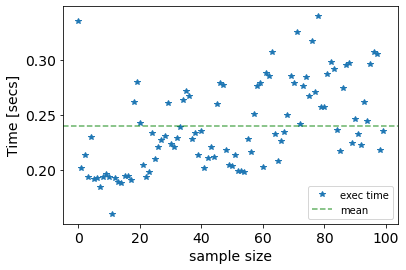

In [7]:
def plot_exec_time(exe_time):
    plt.plot(exe_time,'*')
    plt.axhline(exe_time.mean(),linestyle='--', alpha=0.6,color='green')
    plt.xlabel('sample size',fontsize=14)
    plt.ylabel('Time [secs]',fontsize=14)
    plt.legend(['exec time','mean'])
    print('cumulative time:',round(exe_time.sum(),2),'seconds',)
    print('mean time:',round(exe_time.mean(),2),'seconds')
    print('min time:',round(exe_time.min(),2),'seconds')
    print('max time:',round(exe_time.max(),2),'seconds')
    ax = plt.gca()
    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)

plot_exec_time(exe_time)

**2.** Let's vary the param.dat elements and compute the execution time.

In [8]:
# Set the value of percentage and sample size for lhs
percent = 0.05 # NOTE: for params percent should be <= 0.05 
sample_size = 100
variable = 'params'    # influent/params/ic
method = 'lhs'    #'uniform' or 'lhs'

In [9]:
index=adm1fu.create_a_sample_matrix(variable,method,percent,sample_size)
print ()
print ('Number of elements participated in the sampling:',len(index))

Saves a sampling matrix [sample_size,array_size] into var_params.csv
sample_size,array_size:  (100, 92)
Each column of the matrix corresponds to a variable perturbed 100 times around its original value 
var_params.csv SAVED!

Number of elements participated in the sampling: 92


In [10]:
exe_time=adm1fu.adm1f_output_sampling(ADM1F_EXE,variable,index)

All 100 runs were successfully computed
outputs_params.csv SAVED!


cumulative time: 20.32 seconds
mean time: 0.2 seconds
min time: 0.0 seconds
max time: 0.34 seconds


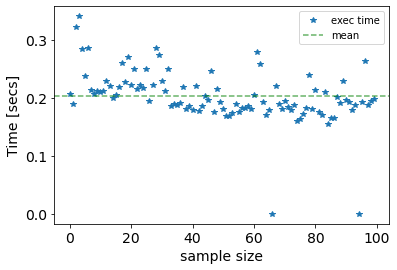

In [11]:
plot_exec_time(exe_time)